# Prime Video Overview
In this project, I built machine learning models, including linear regression, random forest, and XGBoost, to predict the cvt_per_day.

# Part 0 Data ETL

In [ ]:
#import neccessary libraries
import numpy as np
import pandas as pd
import sklearn as sl
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.3f' % x) 
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None) 
pd.set_option('display.max_rows',None)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/My Drive/Amazon Prime video Project'

/content/drive/My Drive/Amazon Prime video Project


In [ ]:
TV=pd.read_csv('TVdata.txt',header=0,sep=',',lineterminator='\n')
print(TV.head())

   video_id  cvt_per_day  weighted_categorical_position  \
0    385504   307127.606                              1   
1    300175   270338.426                              1   
2    361899   256165.867                              1   
3    308314   196622.721                              3   
4    307201   159841.652                              1   

   weighted_horizontal_poition  import_id  release_year  \
0                            3  lionsgate          2013   
1                            3  lionsgate          2013   
2                            3      other          2012   
3                            4  lionsgate          2008   
4                            3  lionsgate          2013   

                                          genres  imdb_votes    budget  \
0                          Action,Thriller,Drama       69614  15000000   
1                          Comedy,Crime,Thriller       46705  15000000   
2                                    Crime,Drama      197596  260000

In [ ]:
TV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   video_id                       4226 non-null   int64  
 1   cvt_per_day                    4226 non-null   float64
 2   weighted_categorical_position  4226 non-null   int64  
 3   weighted_horizontal_poition    4226 non-null   int64  
 4   import_id                      4226 non-null   object 
 5   release_year                   4226 non-null   int64  
 6   genres                         4226 non-null   object 
 7   imdb_votes                     4226 non-null   int64  
 8   budget                         4226 non-null   int64  
 9   boxoffice                      4226 non-null   int64  
 10  imdb_rating                    4226 non-null   float64
 11  duration_in_mins               4226 non-null   float64
 12  metacritic_score               4226 non-null   i

In [ ]:
TV.nunique()

video_id                         4226
cvt_per_day                      4226
weighted_categorical_position      37
weighted_horizontal_poition        68
import_id                           4
release_year                       97
genres                           1165
imdb_votes                       2282
budget                            253
boxoffice                         410
imdb_rating                        85
duration_in_mins                 4097
metacritic_score                   90
awards                              5
mpaa                                6
star_category                     630
dtype: int64

In [ ]:
TV.shape

(4226, 16)

# Part 1: Data Exploration

## 1.1 Exclude erroneous data

Each video should only appear once in the list, duplicated video will be removed. I also check if there are any null value in dataset. We should pay attention to zero value even though there are no any null value.

In [ ]:
# No duplicated index
TV['video_id'].duplicated().any()

False

In [ ]:
# check missing value
print(TV.isnull().sum())


video_id                         0
cvt_per_day                      0
weighted_categorical_position    0
weighted_horizontal_poition      0
import_id                        0
release_year                     0
genres                           0
imdb_votes                       0
budget                           0
boxoffice                        0
imdb_rating                      0
duration_in_mins                 0
metacritic_score                 0
awards                           0
mpaa                             0
star_category                    0
dtype: int64


## 1.2 Understand numerical features

### 1.2.1 Overview of the numerical features

In [ ]:
TV.drop(['video_id', 'release_year'],axis=1).describe(include = ['number'])

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
count,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000
mean,4218.630,7.783,28.104,6462.924,2150743.439,2536338.472,5.257,89.556,15.974,0.955
std,13036.080,6.134,11.864,31596.007,7176604.483,8243516.266,2.123,21.086,26.205,0.955
min,2.188,1.000,1.000,0.000,0.000,0.000,0.000,4.037,0.000,0.000
25%,351.169,4.000,20.000,81.000,0.000,0.000,4.300,82.602,0.000,0.000
50%,1193.500,6.000,28.000,535.000,0.000,0.000,5.800,90.730,0.000,1.000
75%,3356.789,9.000,36.000,3053.000,1500000.000,0.000,6.800,99.500,41.000,1.667
max,307127.606,41.000,70.000,948630.000,107000000.000,184208848.000,10.000,246.017,100.000,4.000


In [ ]:
# The percentage of coulmns that are equal to 0
(TV==0).sum(axis=0)/TV.shape[0] 
# The columns, budget, boxoffice, metacritic_score, star_category, have zeros more than 40%.
# (TV==0).sum(axis=0)

video_id                        0.000
cvt_per_day                     0.000
weighted_categorical_position   0.000
weighted_horizontal_poition     0.000
import_id                       0.000
release_year                    0.000
genres                          0.000
imdb_votes                      0.081
budget                          0.581
boxoffice                       0.756
imdb_rating                     0.081
duration_in_mins                0.000
metacritic_score                0.713
awards                          0.000
mpaa                            0.000
star_category                   0.437
dtype: float64

(4226, 10)


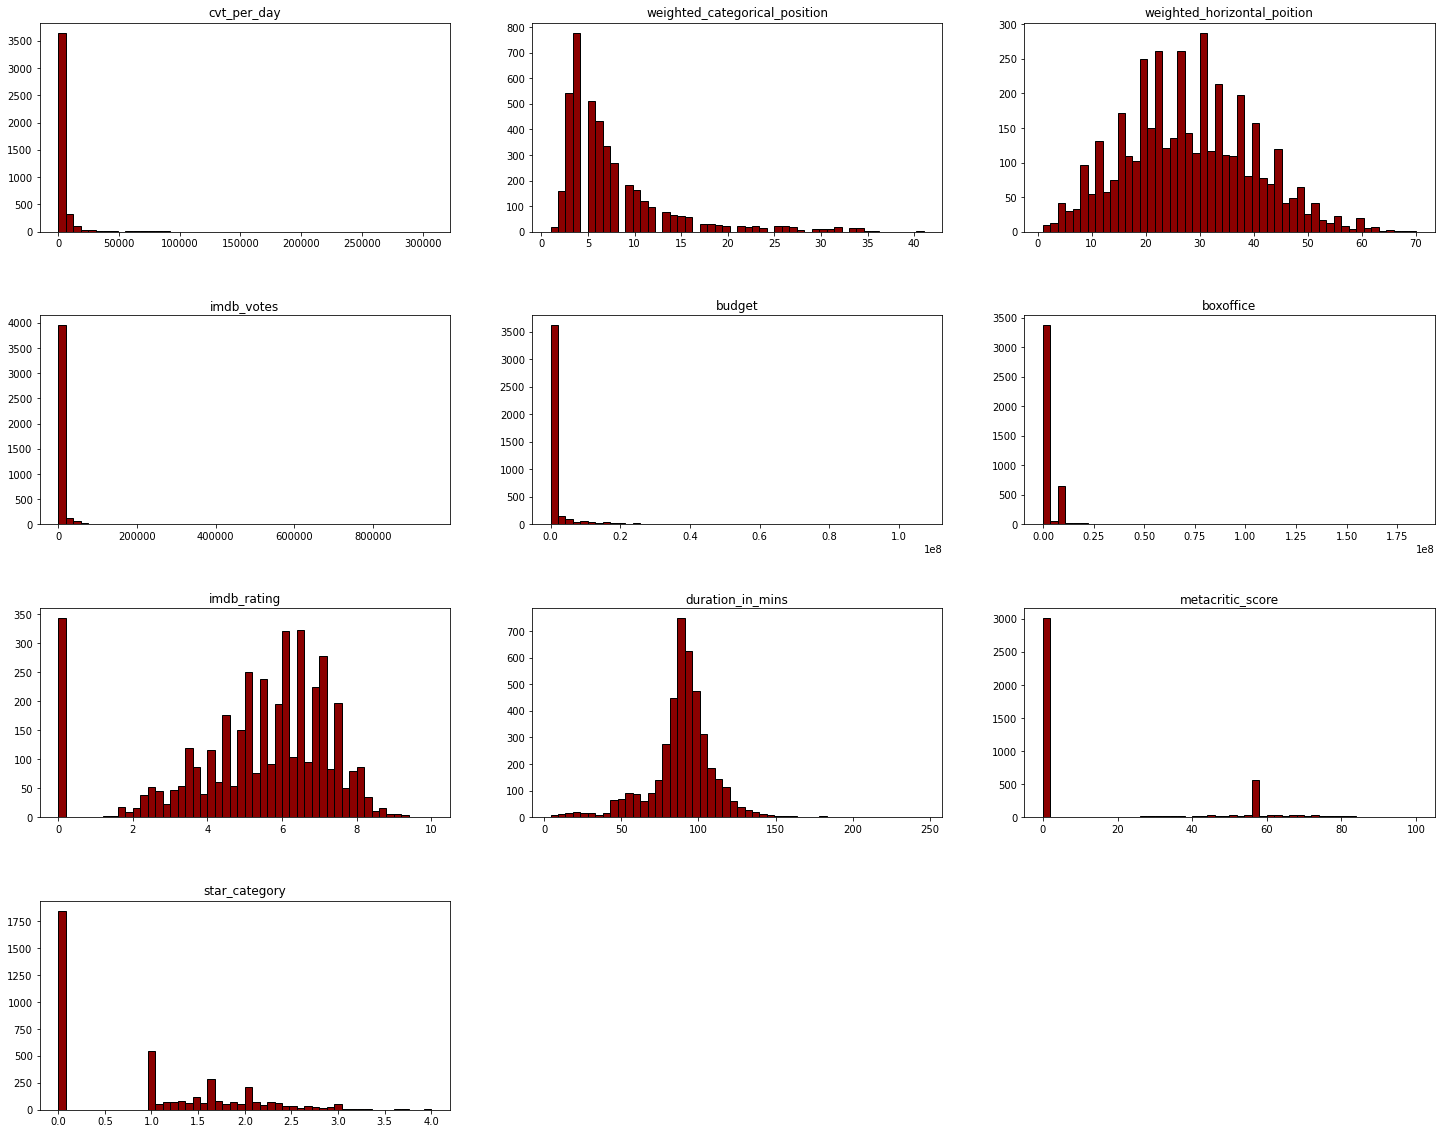

In [ ]:
# histgram for each numeric features
fig=plt.figure(figsize=(25,20))
fig.subplots_adjust(hspace=0.4)
new_tv = TV.select_dtypes(include=[np.number]).drop(['video_id', 'release_year'],axis=1)
print(new_tv.shape)
i = 1
for col in new_tv.columns[:10]:
  plt.subplot(4,3,i)
  plt.hist(x=new_tv.loc[:,col],bins=50, align='mid',color='darkred', edgecolor = 'black')
  plt.title(col) 
  i+=1
fig.show()

### 1.2.2 cvt_per_day feature

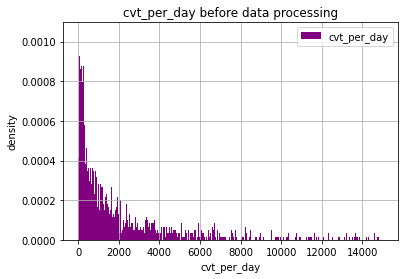

In [ ]:
fig,ax1=plt.subplots(nrows=1)
TV['cvt_per_day'].plot(kind='hist',ax=ax1, bins=range(0,15000,15),color='purple',label='cvt_per_day',density=True)
ax1.set_title('cvt_per_day before data processing')
ax1.set_ylabel('density')
ax1.set_xlabel('cvt_per_day')
ax1.legend(loc='upper right')
ax1.grid(True)
plt.show()

### 1.2.3 Correlation among numerical features

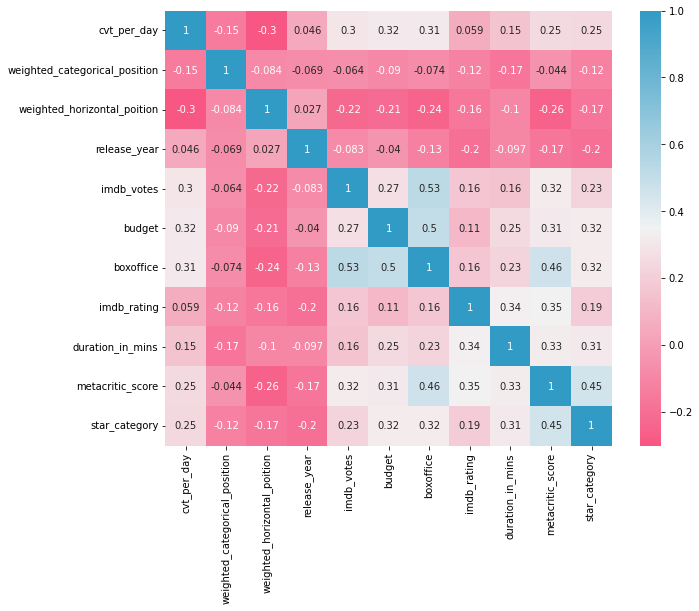

In [ ]:
import seaborn as sb
fig, ax = plt.subplots(figsize=(10, 8))
corr = TV[['cvt_per_day','weighted_categorical_position','weighted_horizontal_poition'
               ,'release_year', 'imdb_votes', 'budget', 'boxoffice' ,'imdb_rating', 
               'duration_in_mins', 'metacritic_score', 'star_category']].corr()
cmap = sb.diverging_palette(0, 230, 90, 60, as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot=True)


## 1.3 Understand categorical features

### 1.3.1 Distribution of standard categorical features

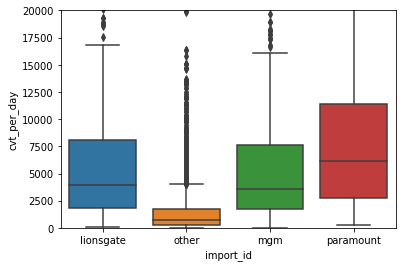

other        2963
lionsgate     677
mgm           445
paramount     141
Name: import_id, dtype: int64


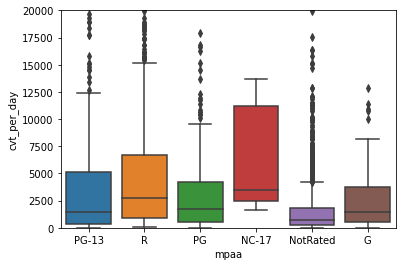

NotRated    2158
R           1158
PG-13        426
PG           353
G            125
NC-17          6
Name: mpaa, dtype: int64


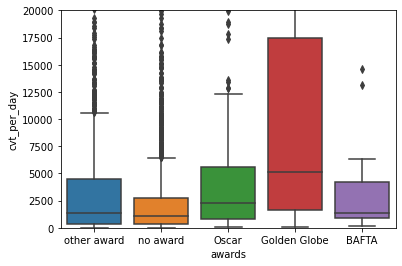

no award        2569
other award     1453
Oscar            141
Golden Globe      44
BAFTA             19
Name: awards, dtype: int64


In [ ]:
sns.boxplot(x='import_id',y='cvt_per_day', data=TV)
plt.ylim((0,20000))
plt.show()
print(TV['import_id'].value_counts())

sns.boxplot(x='mpaa', y='cvt_per_day', data=TV)
plt.ylim((0,20000))
plt.show()
print(TV['mpaa'].value_counts())

sns.boxplot(x='awards', y='cvt_per_day', data=TV)
plt.ylim((0,20000))
plt.show()
print(TV['awards'].value_counts())



### 1.3.2 Distribution of splited genres

In the dataset, some videos belongs to more than 1 genre. To better understand each individual genre, we can split each genres. The last 6 genres can covert to one group since they have small numbers in each individual genres.

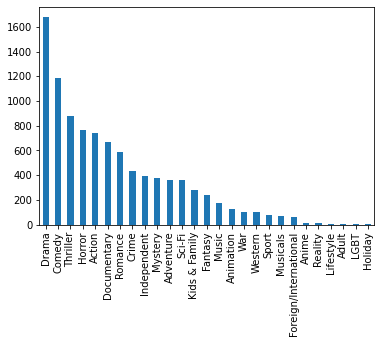

In [ ]:
# generes explore, split the genre of each video
gen_split = TV['genres'].str.get_dummies(sep=',').sum(axis = 0)
gen_split.sort_values(ascending=False).plot.bar()


### 1.3.3 Distribution of release_year

The year the video was released varies widely. Considering that the popularity of videos generally decays over time, release_year should be grouped by the release_year range.

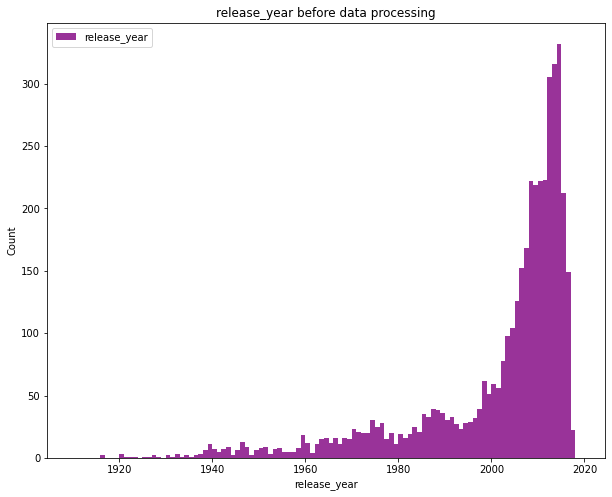

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.hist(TV['release_year'].values, bins = range(1910, 2020, 1), alpha = 0.8, color='purple', label = 'release_year')
plt.legend(loc ='upper left')
plt.title('release_year before data processing')
plt.xlabel('release_year')
plt.ylabel('Count')
plt.show()


In [ ]:
TV['release_year'].describe(percentiles = [.25, .50, .75, .90])


count   4226.000
mean    2001.057
std       17.497
min     1916.000
25%     1998.000
50%     2008.000
75%     2012.000
90%     2014.000
max     2017.000
Name: release_year, dtype: float64

# Part 2: Feature Preprocessing

After the Exploratory Data Analysis, I have to do data cleaning and data preprocessing.
I need three steps to finish  this.
First, I need to perform categorical feature transforamtion.
Second, I need to fill the missing value for both numeric and categorical feature.
Third, I need to scale out feature.



## 2.1 Categorical features

The 5 categorical features: import_id, mpaa, awards, genres, and release_year have no missing data and they can be converted into dummy/indicators.

The first 3 have relatively small sub-types, they can be easily converted to dummies.

The 'genres' have 27 different sub-types, 6 of them are rarely observed (refer to previous section). So I converted 6 of genres into one group, Misc_genres.
Note:
1. a video may have more than one genre, in the feature preprocessing, all genres are handled individually.
2. The release_year is grouped into 10 buckets based on the year range between 1917 and 2017.

In [ ]:
# Convert 3 Categorical variables into dummy variables
d_import_id = pd.get_dummies(TV['import_id']).astype(np.int64) 
d_mpaa = pd.get_dummies(TV['mpaa']).astype(np.int64)
d_awards = pd.get_dummies(TV['awards']).astype(np.int64)

In [ ]:
# Convert 'genres' into dummy variables
d_genres=TV['genres'].str.get_dummies(sep=',').astype(np.int64) 
d_genres['Misc_genres']=d_genres['Anime']|d_genres['Reality']|d_genres['Lifestyle']|d_genres['Adult']|d_genres['LGBT']|d_genres['Holiday'] 
d_genres.drop(['Anime', 'Reality','Lifestyle', 'Adult','LGBT','Holiday'], inplace=True, axis=1)


In [ ]:
TV['release_year'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

0.100   1974.000
0.200   1991.000
0.300   2001.000
0.400   2006.000
0.500   2008.000
0.600   2010.000
0.700   2012.000
0.800   2013.000
0.900   2014.000
Name: release_year, dtype: float64

In [ ]:
# bin release_year and convert into dummies
bin_year = [1916, 1974, 1991, 2001, 2006, 2008, 2010, 2012, 2013, 2014, 2017]
year_range = ['1916-1974', '1974-1991', '1991-2001', '2001-2006','2006-2008','2008-2010','2010-2012','2012-2013',
              '2013-2014','2014-2017']
year_bin = pd.cut(TV['release_year'], bin_year, labels=year_range)
d_year = pd.get_dummies(year_bin).astype(np.int64)

In [ ]:
# new dataframe, drop the previous categorical features, add new dummy variables, check for null

temp_tv=TV.drop(['import_id', 'mpaa','awards','genres', 'release_year'], axis=1)

newTV = pd.concat([temp_tv, d_import_id, d_mpaa, d_awards, d_genres, d_year], axis=1) 
# Combine all the columns into one new dataframe
print(newTV.head())

   video_id  cvt_per_day  weighted_categorical_position  \
0    385504   307127.606                              1   
1    300175   270338.426                              1   
2    361899   256165.867                              1   
3    308314   196622.721                              3   
4    307201   159841.652                              1   

   weighted_horizontal_poition  imdb_votes    budget  boxoffice  imdb_rating  \
0                            3       69614  15000000   42930462        6.500   
1                            3       46705  15000000    3301046        6.500   
2                            3      197596  26000000   37397291        7.300   
3                            4      356339  15000000   15700000        7.600   
4                            3       46720  27220000    8551228        6.400   

   duration_in_mins  metacritic_score  star_category  lionsgate  mgm  other  \
0           112.301                51          1.710          1    0      0   
1     

In [ ]:
newTV.shape

(4226, 58)

## 2.2 Handling zero value




Among the 10 numerical features except video_id, 4 features (budget, boxoffice, metacritic_score, star_category) have over 25% of zero values, which is not reasonable in reality. Two features, imdb_votes and imdb_rating, have less than 10% of zero data.

According to the data info, there is no Null value in our dataset. But we have to be catious as zero value can be a good signal for missing data. So we have to check the ratio of zero value in our numeric feature 

In [ ]:
newTV[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']] = newTV[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']].replace(0, np.nan)
print(newTV.isnull().sum())


video_id                            0
cvt_per_day                         0
weighted_categorical_position       0
weighted_horizontal_poition         0
imdb_votes                        344
budget                           2454
boxoffice                        3194
imdb_rating                       344
duration_in_mins                    0
metacritic_score                 3012
star_category                    1846
lionsgate                           0
mgm                                 0
other                               0
paramount                           0
G                                   0
NC-17                               0
NotRated                            0
PG                                  0
PG-13                               0
R                                   0
BAFTA                               0
Golden Globe                        0
Oscar                               0
no award                            0
other award                         0
Action      

In [ ]:
#Filling missing data with mean value
new_tv_filled = newTV.copy()
for cols in new_tv_filled.columns:
    new_tv_filled[cols].fillna(new_tv_filled[cols].mean(), inplace = True)
print(new_tv_filled.info())

# ['budget','boxoffice','metacritic_score','star_category','imdb_votes','imdb_rating']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   video_id                       4226 non-null   int64  
 1   cvt_per_day                    4226 non-null   float64
 2   weighted_categorical_position  4226 non-null   int64  
 3   weighted_horizontal_poition    4226 non-null   int64  
 4   imdb_votes                     4226 non-null   float64
 5   budget                         4226 non-null   float64
 6   boxoffice                      4226 non-null   float64
 7   imdb_rating                    4226 non-null   float64
 8   duration_in_mins               4226 non-null   float64
 9   metacritic_score               4226 non-null   float64
 10  star_category                  4226 non-null   float64
 11  lionsgate                      4226 non-null   int64  
 12  mgm                            4226 non-null   i

## 2.3 Feature scaling

There are two most common used scaling method: normalization and standardscaler. In the following model training and selections, we choose to use min-max scaling.


In [ ]:
# Standard scaling
# scale_lst = ['weighted_categorical_position', 'weighted_horizontal_poition', 'budget','boxoffice', 
#              'imdb_votes','imdb_rating','duration_in_mins', 'metacritic_score','star_category']
# newTV_sc = new_tv_filled.copy()

# sc_scale = preprocessing.StandardScaler().fit(newTV_sc[scale_lst])
# newTV_sc[scale_lst] = sc_scale.transform(newTV_sc[scale_lst])
# newTV_sc.head()


,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category,lionsgate,mgm,other,paramount,G,NC-17,NotRated,PG,PG-13,R,BAFTA,Golden Globe,Oscar,no award,other award,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Fantasy,Foreign/International,Horror,Independent,Kids & Family,Music,Musicals,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Misc_genres,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,385504,307127.606,-1.106,-2.116,1.984,1.470,4.696,0.542,1.079,-0.630,0.033,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,300175,270338.426,-1.106,-2.116,1.258,1.470,-1.022,0.542,0.257,-1.997,3.434,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,361899,256165.867,-1.106,-2.116,6.043,3.108,3.898,1.100,1.243,0.327,2.102,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,308314,196622.721,-0.780,-2.032,11.077,1.470,0.767,1.309,1.952,5.250,-0.063,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
4,307201,159841.652,-1.106,-2.116,1.258,3.290,-0.265,0.472,0.758,-2.544,3.029,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# MinMax scaling
scale_lst = ['weighted_categorical_position', 'weighted_horizontal_poition', 'budget','boxoffice', 
             'imdb_votes','imdb_rating','duration_in_mins', 'metacritic_score','star_category']
newTV_mm = new_tv_filled.copy()
mm_scale = preprocessing.MinMaxScaler().fit(newTV_mm[scale_lst])
newTV_mm[scale_lst] = mm_scale.transform(newTV_mm[scale_lst])
newTV_mm.head()


,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category,lionsgate,mgm,other,paramount,G,NC-17,NotRated,PG,PG-13,R,BAFTA,Golden Globe,Oscar,no award,other award,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Fantasy,Foreign/International,Horror,Independent,Kids & Family,Music,Musicals,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Misc_genres,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,385504,307127.606,0.000,0.029,0.073,0.140,0.233,0.611,0.447,0.505,0.237,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,300175,270338.426,0.000,0.029,0.049,0.140,0.018,0.611,0.376,0.404,0.750,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,361899,256165.867,0.000,0.029,0.208,0.243,0.203,0.700,0.462,0.576,0.549,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,308314,196622.721,0.050,0.043,0.376,0.140,0.085,0.733,0.523,0.939,0.222,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
4,307201,159841.652,0.000,0.029,0.049,0.254,0.046,0.600,0.419,0.364,0.689,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


# Part 3: Model Training
Algorithms: Linear Regression, Random Forest, XGBoost.

In [ ]:
train, test = train_test_split(newTV_mm, test_size=0.20, random_state =5)
model_train_x = train.drop(['video_id', 'cvt_per_day'], axis = 1)
model_test_x = test.drop(['video_id', 'cvt_per_day'], axis = 1)
model_train_y = train['cvt_per_day']
model_test_y = test['cvt_per_day']

### 3.1 Lasso linear regression
[Sklearn Doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
Lasso Regression is an extension of linear regression that adds a regularization L1 penalty to the loss function during training.

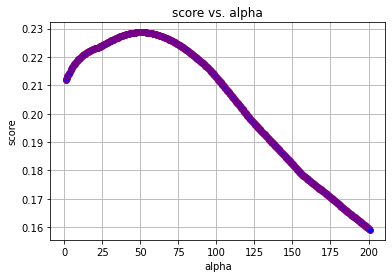

The optimaized alpha and score of Lasso linear is: 


(None, 50.699398797595194, 0.22871389526802188)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
# use train data to find optimal parameters
lr_train, lr_validate = train_test_split(train, test_size=0.15, random_state = 0)

lr_train_x = lr_train.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_validate_x = lr_validate.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_train_y = lr_train['cvt_per_day']
lr_validate_y = lr_validate['cvt_per_day']

alphas = np.linspace (1, 201, num=500)
scores = np.empty_like(alphas) 
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):

    lasso = Lasso()            
    lasso.set_params(alpha = a) 
    lasso.fit(lr_train_x, lr_train_y) 
    scores[i] = lasso.score(lr_validate_x, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        lasso_save = lasso
plt.plot(alphas, scores, color='purple', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
model1_para = opt_a
print ('The optimaized alpha and score of Lasso linear is: '), opt_a, max_score


In [ ]:
# combine the validate data and training data, use the optimal alpha, re-train the model
lasso_f = Lasso()
lasso_f.set_params(alpha = opt_a)
lasso_f.fit(model_train_x, model_train_y)


Lasso(alpha=50.699398797595194)

## 3.2 Ridge linear regression
Ridge Regression is a popular type of regularized linear regression that includes an L2 penalty. This has the effect of shrinking the coefficients for those input variables that do not contribute much to the prediction task.

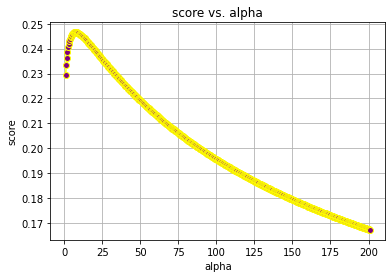

The optimaized alpha and score of Ridge linear is: 


(None, 7.412825651302605, 0.24658604459871114)

In [ ]:
# Use the same training data set as Lasso (linear features)
lr_train, lr_validate = train_test_split(train, test_size=0.15, random_state = 0)

alphas = np.linspace (1, 201, num=500)
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    ridge = Ridge()
    ridge.set_params(alpha = a)
    ridge.fit(lr_train_x, lr_train_y)
    scores[i] = ridge.score(lr_validate_x, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        ridge_save = ridge
plt.plot(alphas, scores, color='yellow', linestyle='dashed', marker='o',markerfacecolor='purple', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
model3_para = opt_a
print ('The optimaized alpha and score of Ridge linear is: '), opt_a, max_score

In [ ]:
# add the 15% validate data, use the optimal alpha, re-train the model

ridge_f = Ridge()
ridge_f.set_params(alpha = opt_a)
ridge_f.fit(model_train_x, model_train_y)

# ridge_f is the Ridge model (linear feature), to be tested with test data.

Ridge(alpha=7.412825651302605)

##3.3 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf=RandomForestRegressor(random_state=2,max_features='sqrt')
param_grid={'n_estimators':[55,56,57,58,59,60,61,62,63],'max_depth':[16,17,18,19,20,21]}
clf=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5)
clf.fit(model_train_x,model_train_y)


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_features='sqrt',
                                             random_state=2),
             param_grid={'max_depth': [16, 17, 18, 19, 20, 21],
                         'n_estimators': [55, 56, 57, 58, 59, 60, 61, 62, 63]})

{'mean_fit_time': array([0.24737549, 0.24271064, 0.24966435, 0.25327158, 0.25637918,
       0.26515665, 0.26686029, 0.27005105, 0.27241101, 0.24707475,
       0.2506794 , 0.25645351, 0.26446662, 0.26200166, 0.26895385,
       0.27550402, 0.2746274 , 0.28377409, 0.25280695, 0.25911112,
       0.26649327, 0.26649919, 0.27277718, 0.27566724, 0.28109679,
       0.28489895, 0.28991761, 0.26258235, 0.26826181, 0.2679316 ,
       0.27663331, 0.2801734 , 0.28375068, 0.29105687, 0.29476943,
       0.30102115, 0.27164464, 0.27424664, 0.27523198, 0.28205442,
       0.290834  , 0.29007096, 0.29627271, 0.30203161, 0.30649462,
       0.27370849, 0.27763247, 0.28617144, 0.28531442, 0.29231153,
       0.29416203, 0.30031023, 0.30484428, 0.31348224]), 'std_fit_time': array([0.00903522, 0.00597212, 0.00462366, 0.00553156, 0.00390333,
       0.0080258 , 0.00406716, 0.00229101, 0.00352053, 0.00365857,
       0.0022745 , 0.00336943, 0.00502599, 0.00258375, 0.00457229,
       0.00500929, 0.00291983, 0.00898

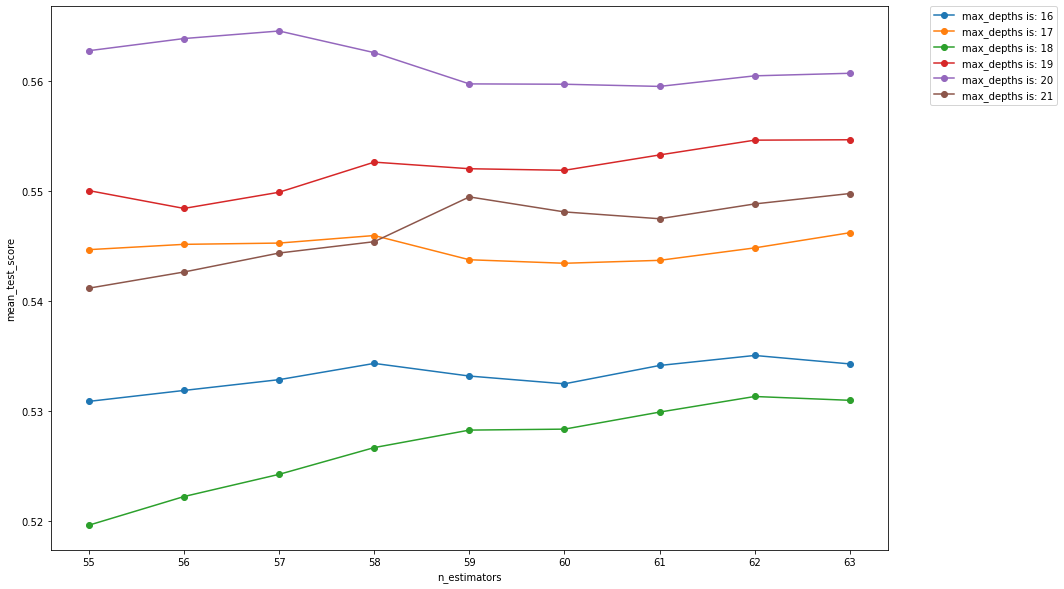

the best parameter for max_depth is: 20
the best parameter for n_estimators is: 57


In [ ]:
result=clf.cv_results_
print(result)
max_depth=[16,17,18,19,20,21]   
n_estimators=[55,56,57,58,59,60,61,62,63]   
scores=clf.cv_results_['mean_test_score'].reshape(len(max_depth),len(n_estimators)) # reshape(6 rows, 9 columns)
plt.figure(1,figsize = [15,10])
plt.subplot(1,1,1)
for i,j in enumerate(max_depth):
  plt.plot(n_estimators,scores[i],'-o',label='max_depths is: '+str(j))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('n_estimators')
plt.ylabel('mean_test_score')
plt.show()
print('the best parameter for max_depth is: '+str(clf.best_params_['max_depth']))
print('the best parameter for n_estimators is: '+str(clf.best_params_['n_estimators']))



##3.4 XGBoost
XGBoost (eXtreme Gradient Boosting) is designed as an optimized implementation of the Gradient Boosting framework. 


In [ ]:
import xgboost as xgb


In [ ]:

params = { 'max_depth': [16,17,18,19,20,21],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [55,56,57,58,59,60,61,62,63],
           'colsample_bytree': [0.3, 0.7]}
xgbr = xgb.XGBRegressor(seed = 20, random_state=2,max_features='sqrt')
clf_XGBoost = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1,
                   cv=5)
clf_XGBoost.fit(model_train_x,model_train_y)


In [ ]:
result=clf_XGBoost.cv_results_
print("Best parameters:", clf_XGBoost.best_params_)
print("Lowest RMSE: ", (-clf_XGBoost.best_score_)**(1/2.0))


{'mean_fit_time': array([0.70795183, 0.71126199, 0.70506287, 0.72489433, 0.71932106,
       0.72285008, 0.73691654, 0.74908686, 0.76528373, 0.70613046,
       0.71657767, 0.73487597, 0.75250554, 0.7646585 , 0.78817811,
       0.94192634, 0.79349542, 0.80987215, 0.74050474, 0.75202255,
       0.76733322, 0.78814626, 0.79936147, 0.80637393, 0.81923018,
       0.83256502, 0.85216451, 0.76857991, 0.78367043, 0.79978409,
       0.81664782, 0.83329029, 0.85050969, 0.86563015, 0.88195219,
       0.8912015 , 0.7988595 , 0.81323977, 0.82342491, 0.84106536,
       1.00733089, 0.86926799, 0.88424425, 0.89856811, 0.91173267,
       0.81482382, 0.97942843, 0.85565209, 0.8650383 , 0.88742752,
       0.90446525, 0.92640853, 0.92363467, 0.94781466, 0.67731481,
       0.68948054, 0.70501585, 0.71147776, 0.73145947, 0.74303508,
       0.75684876, 0.77061992, 0.78154736, 0.72434673, 0.73871684,
       0.75590067, 0.76737742, 0.77563291, 0.79447131, 0.81212106,
       0.81834521, 0.83404365, 0.76790733, 0

# Part 4: Model Evaluation

## 4.1: Evaluate all models
I evaluate all models by using model score, MSE, and RMSE.

In [ ]:
train_x = model_train_x
train_y = model_train_y
test_x = model_test_x
test_y = model_test_y

In [ ]:
#For lasso
from sklearn.linear_model import Lasso
from sklearn.metrics import  mean_squared_error
lasso=Lasso(alpha=model1_para)
lasso.fit(train_x,train_y)
pred_y=lasso.predict(test_x)
lasso_score=lasso.score(test_x,test_y)
MSE_lasso=mean_squared_error(test_y,pred_y)
RMSE_lasso=np.sqrt(MSE_lasso)
print ('lasso score: ', lasso_score)
print ('Mean square error of lasso: ', MSE_lasso)
print ('Root mean squared error of lasso:', RMSE_lasso)

lasso score:  0.16987568000280395
Mean square error of lasso:  150085531.39147997
Root mean squared error of lasso: 12250.940020728203


In [ ]:
#for ridge
from sklearn.metrics import  mean_squared_error
ridge=Ridge(alpha=model3_para)
ridge.fit(train_x,train_y)
pred_y=ridge.predict(test_x)
ridge_score=ridge.score(test_x,test_y)
MSE_ridge=mean_squared_error(test_y,pred_y)
RMSE_ridge=np.sqrt(MSE_ridge)
print ('ridge score: ', ridge_score)
print ('Mean square error of ridge: ', MSE_ridge)
print ('Root mean squared error of ridge:', RMSE_ridge)

ridge score:  0.1758287740275064
Mean square error of ridge:  149009218.7734809
Root mean squared error of ridge: 12206.933225568202


In [ ]:
#For randomforest regression
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=clf.best_params_['n_estimators'],max_depth=clf.best_params_['max_depth'],max_features='sqrt',random_state=2,n_jobs=-1)
rf.fit(train_x,train_y)
pred_y=rf.predict(test_x)
rf_score=rf.score(test_x,test_y)
MSE_rf=mean_squared_error(test_y,pred_y)
RMSE_rf=np.sqrt(MSE_rf)
print ('rf score: ', rf_score)
print ('Mean square error of rf: ', MSE_rf)
print ('Root mean squared error of rf:', RMSE_rf)


rf score:  0.4509470590986676
Mean square error of rf:  99268146.24285392
Root mean squared error of rf: 9963.340114783492


In [ ]:
#For XGBoost regression
XGBoost=xgb.XGBRegressor(colsample_bytree = clf_XGBoost.best_params_['colsample_bytree'],learning_rate = clf_XGBoost.best_params_['learning_rate'],n_estimators=clf_XGBoost.best_params_['n_estimators'],max_depth=clf_XGBoost.best_params_['max_depth'],max_features='sqrt',random_state=2,n_jobs=-1)
XGBoost.fit(train_x,train_y)
pred_y=XGBoost.predict(test_x)
XGB_score=XGBoost.score(test_x,test_y)
MSE_XGB=mean_squared_error(test_y,pred_y)
RMSE_XGB=np.sqrt(MSE_XGB)
print ('XGBoost score: ', XGB_score)
print ('Mean square error of rf: ', MSE_XGB)
print ('Root mean squared error of rf:', RMSE_XGB)

[01:48:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost score:  0.6485041253108677
Mean square error of rf:  63550053.72545846
Root mean squared error of rf: 7971.828756656684


## 4.2 Model comparison 
Visualize model performance.
Compared to four models, XGBoost has better performance.

In [ ]:
lst_score = [lasso_score, ridge_score, rf_score, XGB_score]
MSE_lst =  [MSE_lasso, MSE_ridge, MSE_rf, MSE_XGB]
RMSE_lst =  [RMSE_lasso, RMSE_ridge, RMSE_rf, RMSE_XGB]
model_lst = ['Lasso_linear', 'Ridge linear', 'Random forest', 'XGBoost']

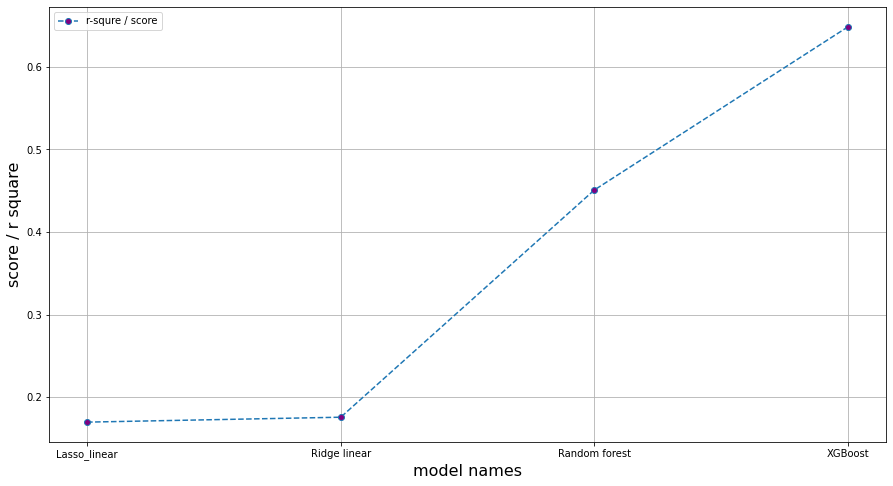

In [ ]:
# R square comparison
plt.figure(1, figsize = [15,8])
plt.plot(model_lst, lst_score, linestyle='dashed', marker='o',markerfacecolor='purple', markersize=6)
plt.legend(['r-squre / score'])
plt.xlabel('model names',fontsize =16)
plt.ylabel('score / r square', fontsize =16)
plt.grid(True)
plt.show()

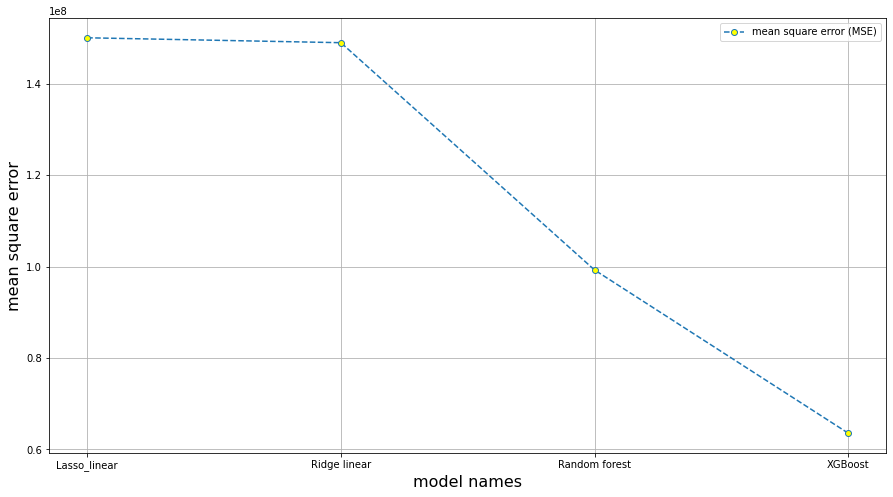

In [ ]:
# MSE comparison
plt.figure(2, figsize = [15,8])
plt.plot(model_lst, MSE_lst, linestyle='dashed', marker='o',markerfacecolor='yellow', markersize=6)
plt.legend(['mean square error (MSE)'])
plt.xlabel('model names', fontsize =16)
plt.ylabel('mean square error', fontsize =16)
plt.grid(True)
plt.show()

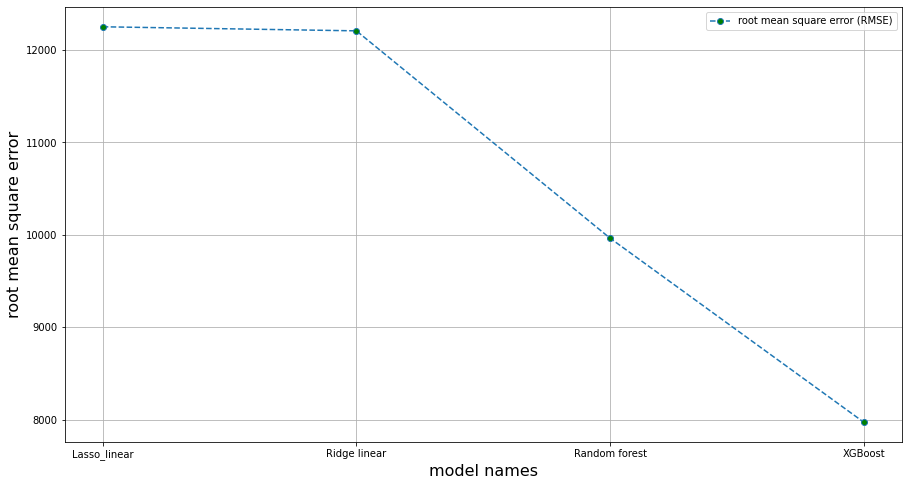

In [ ]:
# RMSE comparison
plt.figure(3, figsize = [15,8])
plt.plot(model_lst, RMSE_lst, linestyle='dashed', marker='o',markerfacecolor='green', markersize=6)
plt.legend(['root mean square error (RMSE)'])
plt.xlabel('model names', fontsize =16)
plt.ylabel('root mean square error', fontsize =16)
plt.grid(True)
plt.show()


## 4.3 Feature importance
 The top 3 features are weighted_categorical_position, imdb_votes, and weighted_horizontal_position.

According to MSE,RMSE and R square, the XGBoost Regression has the best performance

[03:01:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:01:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


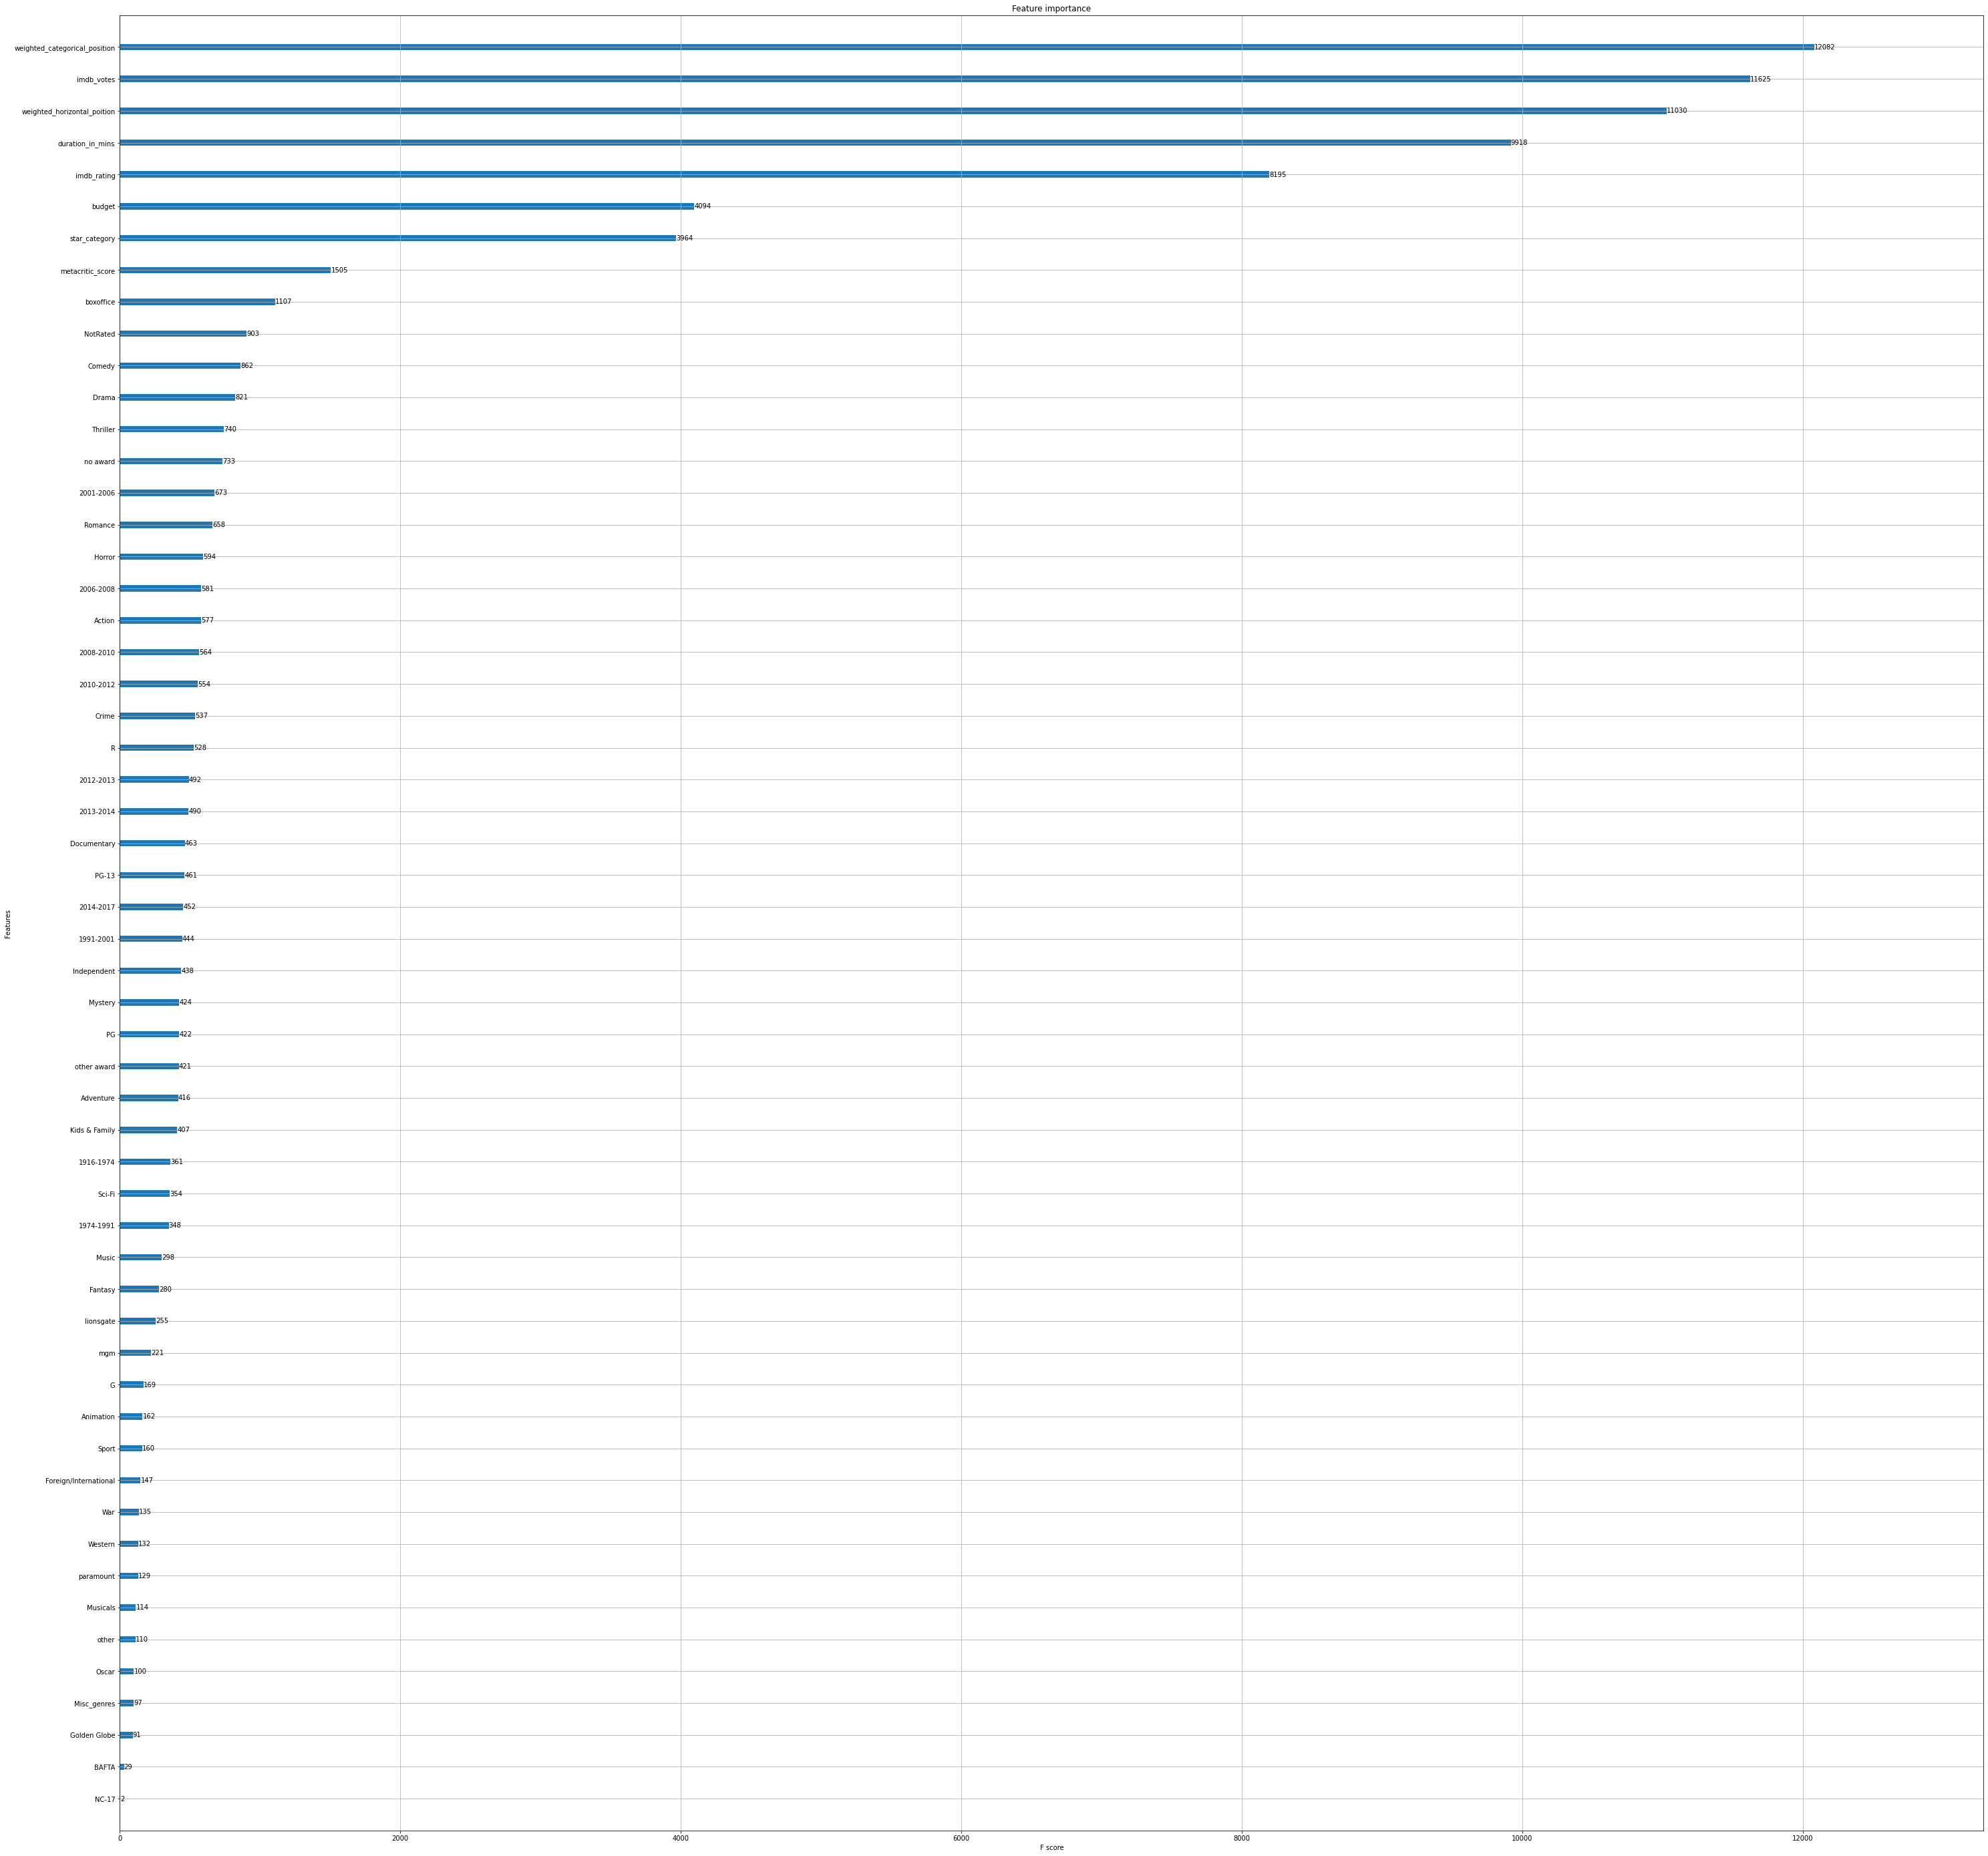

In [ ]:
XGBoost=xgb.XGBRegressor(colsample_bytree = clf_XGBoost.best_params_['colsample_bytree'],learning_rate = clf_XGBoost.best_params_['learning_rate'],n_estimators=clf_XGBoost.best_params_['n_estimators'],max_depth=clf_XGBoost.best_params_['max_depth'],max_features='sqrt',random_state=2,n_jobs=-1)
XGBoost.fit(model_train_x,model_train_y)
xgb.plot_importance(XGBoost.fit(model_train_x,model_train_y))
plt.rcParams['figure.figsize'] = [100, 50]
plt.show()